### Data Petri Net - Example for Explainable Representations

The used p2p base event log has the following implemented decision points with guards:

- Request Manager or Standard Approval:
    - Request Manager Approval if total_price >= 800
    - Request Standard Approval if total_price <= 1000
- Manager Rejection or Approval:
    - Manager Rejection if total_price >= 400 and random_exponential(100, 200) > 100
    - Otherwise Manager Approval
- Standard Rejection or Approval:
    - Standard Rejection if total_price >= 400 and random_exponential(100, 200) > 100
    - Otherwise Standard Approval

In [1]:
import os
from exdpn.util import import_log
from exdpn.data_petri_net import data_petri_net
from exdpn.guards import ML_Technique
import matplotlib.pyplot as plt 

c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### First, create a Data Petri Net.

In [2]:
event_log_base = import_log(os.path.join(os.getcwd(), "..", 'datasets', 'p2p_base.xes'))
dpn_base = data_petri_net.Data_Petri_Net(event_log = event_log_base, 
                                         event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                         verbose = False)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


#### Closer look at the decision points.

In [3]:
decision_points = list(dpn_base.decision_points)
decision_points

[({'create purchase order'}, {'request manager approval', 'request standard approval'}),
 ({'request standard approval'}, {'reject purchase', 'approve purchase'}),
 ({'request manager approval'}, {'manager reject purchase', 'manager approve purchase'})]

#### Select one decision point for the further anaylsis.

In [4]:
# create dictionary to map place names to actual places
place_names = {dp.name.split(", {")[0]+")": dp.name for dp in decision_points}
place_dict = {name: dp for dp in decision_points for name in place_names if place_names[name] == dp.name} 
# select a certrain decision point and the corresponding data set 
decision_point = place_dict["({'create purchase order'})"]
decision_point

({'create purchase order'}, {'request manager approval', 'request standard approval'})

#### Compare Performances of all machine learning techniques.

Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000002B48A7DD330>


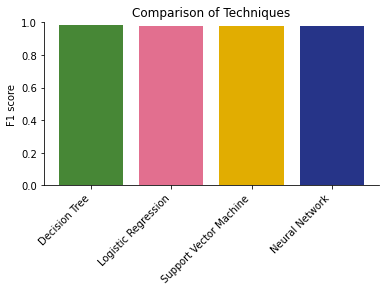

In [5]:
comparision_plot = dpn_base.guard_manager_per_place[decision_point].get_comparison_plot()
print("Best guard:", dpn_base.get_guard_at_place(decision_point))

#### Now get explainable representations of all machine learing guards at that decision point.

Decision Tree


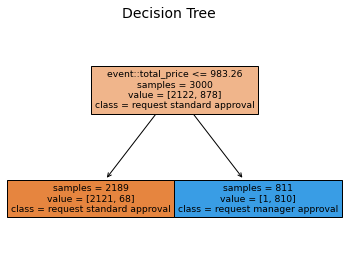

In [6]:
dt_guard = dpn_base.guard_manager_per_place[decision_point].guards_list[ML_Technique.DT]
if dt_guard.is_explainable():
    print("Decision Tree")
    dt_explainable_representation = dt_guard.get_explainable_representation()

Support Vector Machine


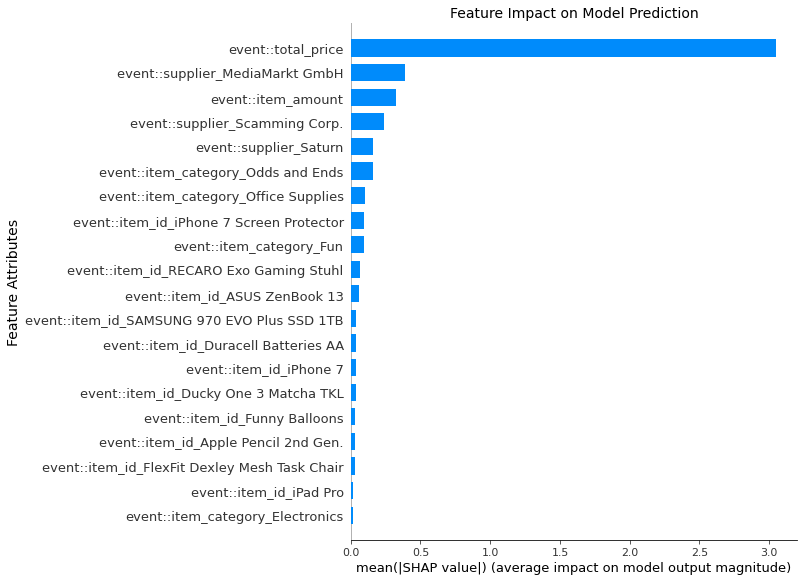

In [7]:
svm_guard = dpn_base.guard_manager_per_place[decision_point].guards_list[ML_Technique.SVM]
if svm_guard.is_explainable():
    print("Support Vector Machine")
    svm_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_point].X_test)

Neural Network


100%|██████████| 100/100 [00:54<00:00,  1.82it/s]


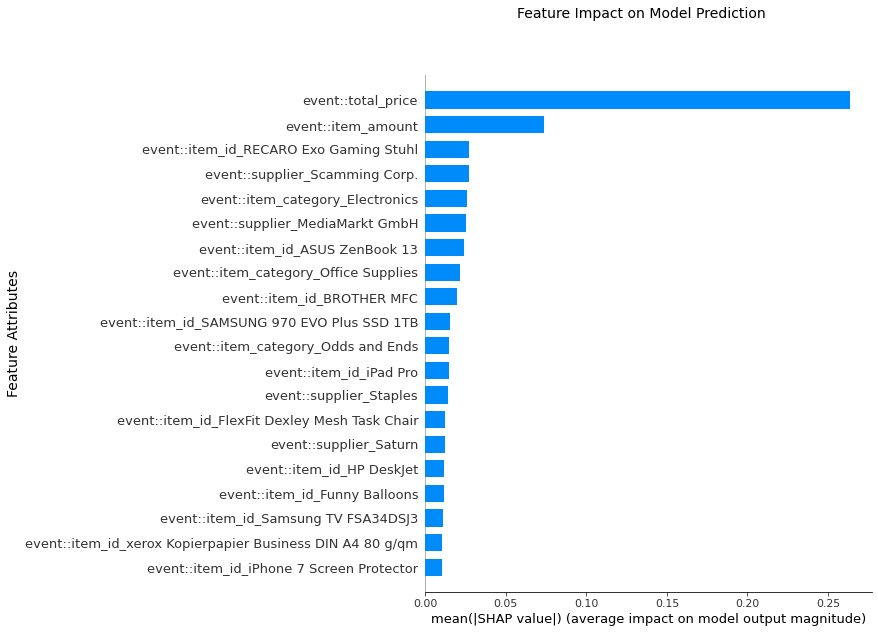

In [8]:
nn_guard = dpn_base.guard_manager_per_place[decision_point].guards_list[ML_Technique.NN]
if nn_guard.is_explainable():
    print("Neural Network")
    # use sample of test data to speed up computation of explainable representation
    sampled_test_data = dpn_base.guard_manager_per_place[decision_point].X_test.sample(n = min(100, len(dpn_base.guard_manager_per_place[decision_point].X_test)))
    nn_guard.get_explainable_representation(sampled_test_data)

Logistic Regression


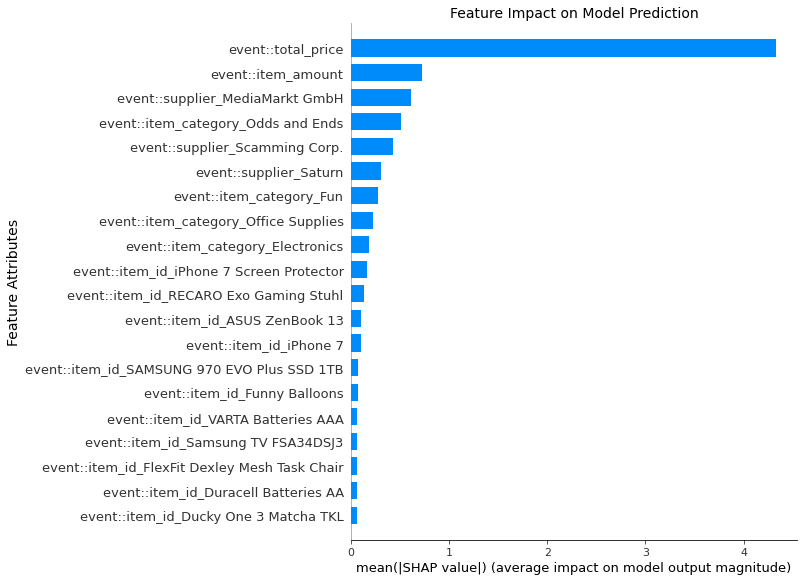

In [9]:
lr_guard = dpn_base.guard_manager_per_place[decision_point].guards_list[ML_Technique.LR]
if lr_guard.is_explainable():
    print("Logistic Regression")
    lr_guard.get_explainable_representation(dpn_base.guard_manager_per_place[decision_point].X_test)